Source of the codes:
https://www.geeksforgeeks.org/machine-learning/linear-regression-python-implementation/

## 1. Linear Regression

Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Function to estimate the coefficients

In [3]:
def estimate_coef(x, y):
    # Number of observations or points
    n = np.size(x)
    
    # Mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # Calculate cross-deviation and deviation about x
    SS_xy = np.sum(x*y) - n * m_y * m_x
    SS_xx = np.sum(x*x) - n * m_x * m_x

    # Calculate the regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    
    return (b_0, b_1)

Function to plot the regression line

In [10]:
def plot_regression_line(x, y, b):
    # Plotting the actual points as scatter plot
    plt.scatter(x, y, color = "b", marker="o", s = 30)
    
    # Predicted response vector
    y_pred = b[0] + b[1] * x
    
    # Plotting the regression line
    plt.plot(x, y_pred, color = "r")
    
    # Labels
    plt.xlabel('x')
    plt.ylabel('y')

Define the observations/data x and y

In [5]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

Estimate the coefficients

In [6]:
b = estimate_coef(x, y)
print(f"Estimated coefficients:\nnb_0 = {b[0]} \nnb_1 = {b[1]}")

Estimated coefficients:
nb_0 = 1.2363636363636363 
nb_1 = 1.1696969696969697


Plot the points along with the regression line

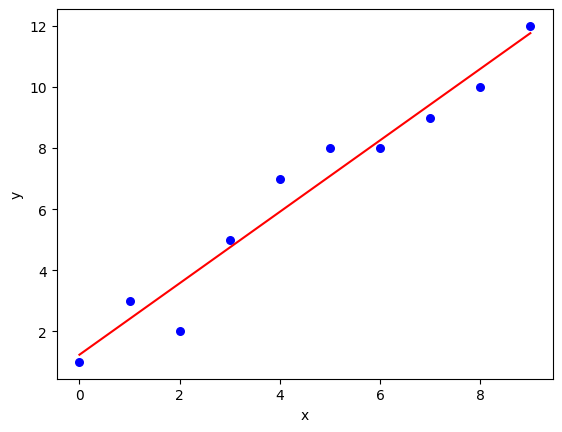

In [11]:
plot_regression_line(x, y, b)

## 2. Multiple Linear Regression

Import necessary libraries

In [21]:
# Basic libaries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit Learn library for necessary machine learning functions
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

Load the Boston Housing Dataset csv and convert it to dataframe

In [22]:
data_url =  "https://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
df.head(5)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2492338170.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


Data Preprocessing

In [26]:
X = np.hstack([df.values[::2, :], df.values[1::2, :2]])
y = df.values[1::2, 2]
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 506
Length of y: 506


Split the data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.4, 
    random_state = 1
)

Create and train the Linear Regression Model

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Evaluate the model's performance using the test set

In [32]:
# Regression coefficients
print("Coefficients: \n", reg.coef_)

# Variance score: 1 means perfect prediction
print("\nVariance score: ", reg.score(X_test, y_test))

Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]

Variance score:  0.720905667266174


Plot residual errors

<function matplotlib.pyplot.show(close=None, block=None)>

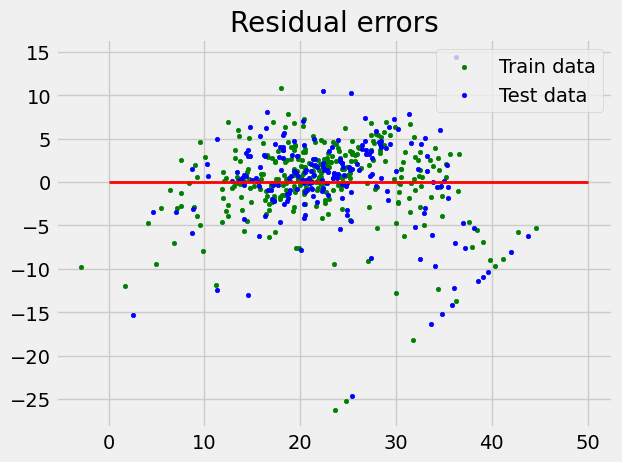

In [35]:
# Setting plot style
plt.style.use('fivethirtyeight')

# Plotting residual errors in training data
plt.scatter(
    reg.predict(X_train),
    reg.predict(X_train) - y_train,
    color = "green", 
    s = 10,
    label = 'Train data'
)

# Plotting residual errors in test data
plt.scatter(
    reg.predict(X_test),
    reg.predict(X_test) - y_test,
    color = "blue", 
    s = 10,
    label = 'Test data'
)

# Plot line for zero residual error
plt.hlines(y = 0, xmin= 0, xmax= 50, linewidth = 2, color = "red")

# Plot legend
plt.legend(loc = 'upper right')

# Plot title
plt.title("Residual errors")

plt.show

## 3. Polynomial Regression

Import necessary libraries

In [70]:
# Basic liraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Ignore the warning
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [61]:
data_url =  "https://media.geeksforgeeks.org/wp-content/uploads/20250115165825561847/Position_Salaries.csv"
df = pd.read_csv(data_url)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Define X and y

In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

create and train the Linear Regression Model

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Perform quadratic and cubic regression by generating polynomial features from the original data

In [71]:
poly_reg2   = PolynomialFeatures(degree=2)
X_poly      = poly_reg2.fit_transform(X)
lin_reg_2   = LinearRegression()
lin_reg_2.fit(X_poly,y)

poly_reg3   = PolynomialFeatures(degree=3)
X_poly3     = poly_reg3.fit_transform(X)
lin_reg_3   = LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

Visualize the Simple Linear Regression

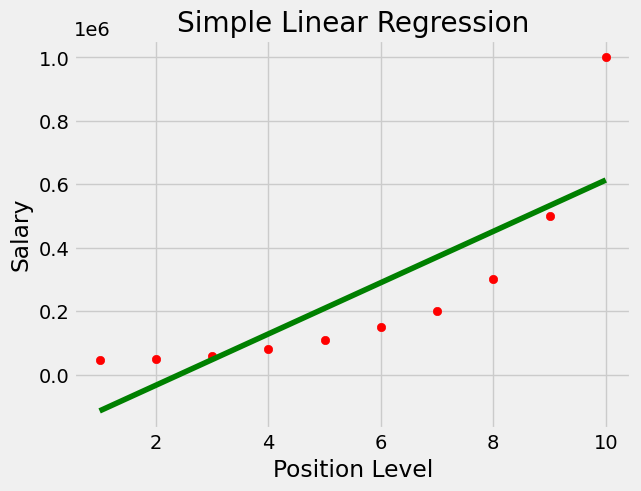

In [73]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.title('Simple Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualize the Polynomial Linear Regression Degree 2

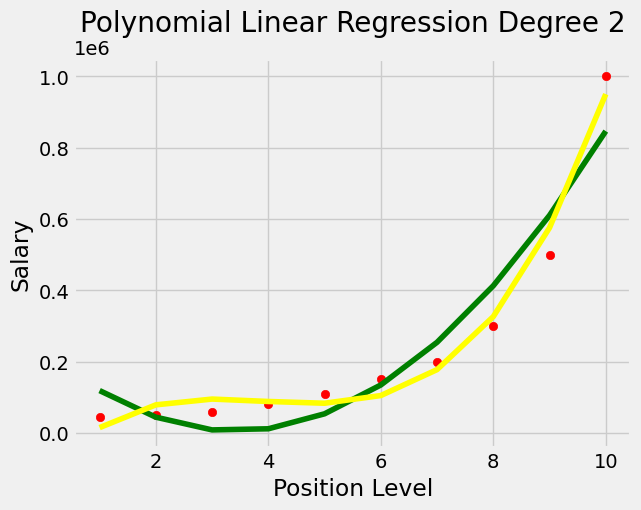

In [74]:
plt.style.use('fivethirtyeight')
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg2.fit_transform(X)), color='green')
plt.plot(X, lin_reg_3.predict(poly_reg3.fit_transform(X)), color='yellow')
plt.title('Polynomial Linear Regression Degree 2')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualize the Polynomial Linear Regression Degree 3

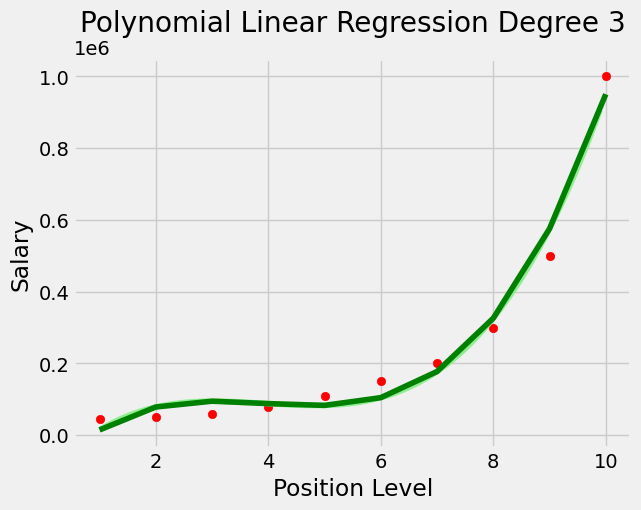

In [75]:
plt.style.use('fivethirtyeight')
X_grid = np.arange(min(X), max(X), 0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_3.predict(poly_reg3.fit_transform(X_grid)), color='lightgreen')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Linear Regression Degree 3')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()